# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [47]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import key_weathermap
from datetime import date

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

#http://history.openweathermap.org/data/2.5/history/city?q=London,UK

# Build partial query URL
query_url = f"{url}appid={key_weathermap}&units={units}&q="

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [48]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
w=len(cities)
# city.country_code

In [49]:
response = requests.get(query_url + cities[15]).json()
response

{'coord': {'lon': -73.76, 'lat': -42.48},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 10,
  'pressure': 1015,
  'humidity': 81,
  'temp_min': 10,
  'temp_max': 10},
 'visibility': 10000,
 'wind': {'speed': 4.6, 'deg': 200},
 'clouds': {'all': 75},
 'dt': 1562437865,
 'sys': {'type': 1,
  'id': 8512,
  'message': 0.007,
  'country': 'CL',
  'sunrise': 1562415863,
  'sunset': 1562448885},
 'timezone': -14400,
 'id': 3896218,
 'name': 'Castro',
 'cod': 200}

In [50]:
# set up lists to hold reponse info
cities_ret=[]
code=[]
lat = []
temp = []
humid =[]
cloud=[]
wind =[]

# Loop through the list of cities and perform a request for data on each
for city in cities:
    today=date.today()
    try:
        response = requests.get(query_url + city).json()
        cities_ret.append(response['name'])
        code.append(response['id'])
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        print(f"--Processing record {city} of {w}")
    except KeyError:
        print("City not found, skipping...")
print("Data retrieval completed")

--Processing record rio grande of 652
--Processing record victoria of 652
--Processing record fortuna of 652
City not found, skipping...
--Processing record clyde river of 652
--Processing record lavrentiya of 652
--Processing record vaini of 652
--Processing record anagni of 652
--Processing record butembo of 652
--Processing record dikson of 652
--Processing record linares of 652
--Processing record mizan teferi of 652
--Processing record rikitea of 652
City not found, skipping...
--Processing record mehamn of 652
--Processing record castro of 652
--Processing record batagay of 652
City not found, skipping...
--Processing record tenenkou of 652
--Processing record bethel of 652
--Processing record vila franca do campo of 652
--Processing record albany of 652
--Processing record hilo of 652
--Processing record lebu of 652
--Processing record cabo san lucas of 652
--Processing record chuy of 652
City not found, skipping...
--Processing record edd of 652
--Processing record georgetown o

--Processing record sonoita of 652
--Processing record isangel of 652
--Processing record katsuura of 652
--Processing record mount pleasant of 652
--Processing record kulachi of 652
--Processing record polyarnyy of 652
City not found, skipping...
--Processing record east london of 652
City not found, skipping...
--Processing record sao filipe of 652
--Processing record moerai of 652
--Processing record avera of 652
City not found, skipping...
City not found, skipping...
--Processing record brae of 652
--Processing record dalby of 652
--Processing record portree of 652
--Processing record bitung of 652
--Processing record sungaipenuh of 652
--Processing record hambantota of 652
--Processing record wiarton of 652
--Processing record sergeyevka of 652
--Processing record margate of 652
City not found, skipping...
--Processing record verkhnyaya sinyachikha of 652
--Processing record yulara of 652
--Processing record nanortalik of 652
--Processing record taoudenni of 652
--Processing recor

--Processing record baltasi of 652
City not found, skipping...
--Processing record macau of 652
City not found, skipping...
--Processing record martapura of 652
--Processing record quatre cocos of 652
--Processing record puerto rondon of 652
--Processing record clifton of 652
--Processing record port hawkesbury of 652
--Processing record marsa matruh of 652
--Processing record mandalgovi of 652
--Processing record carutapera of 652
--Processing record kailua of 652
--Processing record skelleftea of 652
--Processing record santiago del estero of 652
--Processing record aleksandrovka of 652
--Processing record touros of 652
--Processing record guaruja of 652
--Processing record monopoli of 652
--Processing record te karaka of 652
--Processing record salalah of 652
City not found, skipping...
--Processing record opuwo of 652
--Processing record kaili of 652
--Processing record bambanglipuro of 652
--Processing record porto san giorgio of 652
--Processing record attingal of 652
--Processin

In [59]:
# create a data frame with retrieved info
weather_dict = {
    "City": cities_ret,
    "Id":code,
    "Latitude": lat,
    "Temp [K]": temp,
    "Humidity":humid,
    "Cloudiness":cloud,
    "Wind Speed":wind}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Id,Latitude,Temp [K],Humidity,Cloudiness,Wind Speed
0,Rio Grande,3451138,-32.03,13.00,50,40,6.20
1,Victoria,1733782,5.28,26.07,88,75,1.40
2,Fortuna,5563839,40.60,18.75,63,75,5.10
3,Clyde River,5924351,70.47,2.00,100,90,8.20
4,Lavrentiya,4031637,65.58,17.44,53,24,1.47


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


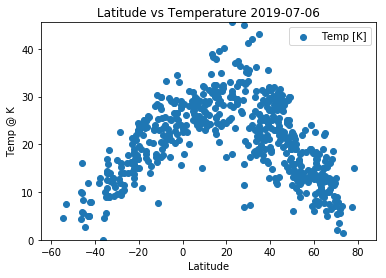

<Figure size 432x288 with 0 Axes>

In [53]:
x_axis = weather_data["Latitude"]
plt.scatter(x_axis,weather_data["Temp [K]"])
#Plot data format for easier reading, axes labeling, title, legend location, etc
plt.xlim(min(x_axis-10), max(x_axis+10))
plt.ylim(min(weather_data["Temp [K]"]),max(weather_data["Temp [K]"])) #why min is not getting the right value??
plt.title(f"Latitude vs Temperature {today}")
plt.xlabel("Latitude")
plt.ylabel("Temp @ K")
plt.legend(loc="best")
plt.show()
plt.savefig("Images/lat-temp.png")

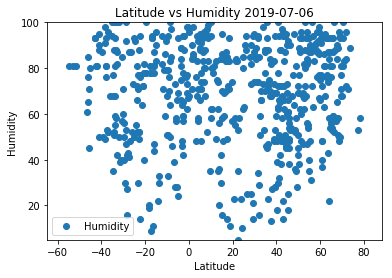

<Figure size 432x288 with 0 Axes>

In [66]:
x_axis = weather_data["Latitude"]
plt.scatter(x_axis,weather_data["Humidity"])
#Plot data format for easier reading, axes labeling, title, legend location, etc
plt.xlim(min(x_axis-10), max(x_axis+10))
plt.ylim(min(weather_data["Humidity"]),max(weather_data["Humidity"])) #why min is not getting the right value??
plt.title(f"Latitude vs Humidity {today}")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.legend(loc="best")
plt.show()
plt.savefig("Images/lat-humid.png")

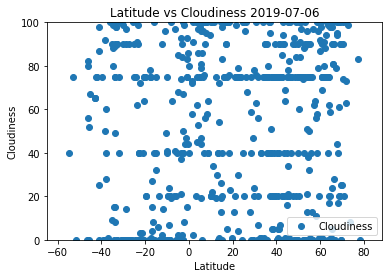

<Figure size 432x288 with 0 Axes>

In [69]:
x_axis = weather_data["Latitude"]
plt.scatter(x_axis,weather_data["Cloudiness"])
#Plot data format for easier reading, axes labeling, title, legend location, etc
plt.xlim(min(x_axis-10), max(x_axis+10))
plt.ylim(min(weather_data["Cloudiness"]),max(weather_data["Cloudiness"]))
plt.title(f"Latitude vs Cloudiness {today}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.legend(loc="best")
plt.show()
plt.savefig("Images/lat-cloud.png")

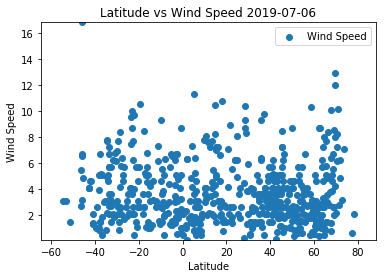

<Figure size 432x288 with 0 Axes>

In [70]:
x_axis = weather_data["Latitude"]
plt.scatter(x_axis,weather_data["Wind Speed"])
#Plot data format for easier reading, axes labeling, title, legend location, etc
plt.xlim(min(x_axis-10), max(x_axis+10))
plt.ylim(min(weather_data["Wind Speed"]),max(weather_data["Wind Speed"]))
plt.title(f"Latitude vs Wind Speed {today}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.legend(loc="best")
plt.show()
plt.savefig("Images/lat-wind.png")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

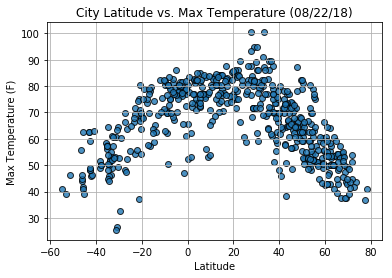

#### Latitude vs. Humidity Plot

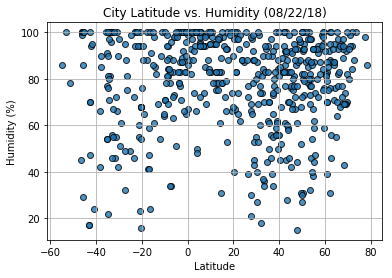

#### Latitude vs. Cloudiness Plot

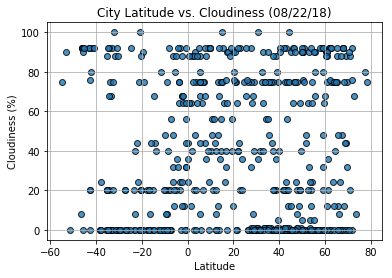

#### Latitude vs. Wind Speed Plot

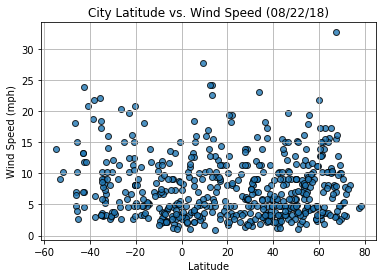